## Pattern Recognition
### Assignment 3 
#### Group 4:

- COE18B056 - Thigulla Vamsi Krishna
- COE18B065 - Srinivasan R Sharma
- CED18I039 - Paleti Krishnasai

## Question 1

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('gender_feature_vectors.csv')
df.head(3)

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,1,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,2,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,3,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116


In [3]:
features = df.drop(['Unnamed: 0', 'Unnamed: 1'], axis = 1)
X = features
X.head(3)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,-0.044872,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,-0.044821,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,-0.052085,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116


In [4]:
def PCA(X):

    mean = np.average(X, axis = 0)

    Z = (X - mean) /  (np.max(X, axis = 0) - np.min(X, axis = 0))
    cov_mat = np.dot(Z.T, Z)

    e_val, e_vec = np.linalg.eig(cov_mat)
    print('Eigen value shape :', e_val.shape,'Eigen vector shape :', e_vec.shape)

    sorted_e_val = np.flip(np.sort(e_val))
    sorted_e_vec = e_vec.copy()
    dummy = 0

    for val in sorted_e_val:
        ind = np.argmax(e_val == val * 1)
        sorted_e_vec[:,dummy] = e_vec[:,ind]
        dummy +=1

    variances = []
    for i in sorted_e_val:
        variances.append(i/np.sum(sorted_e_val))
        
    variances.sort()
    d_dash = 0
    var = 0
    
    for i in variances[::-1]:
        if(var<0.95):
            var = var + i
            d_dash = d_dash + 1
        else:
            break
        
    plt.figure(figsize= (55, 13))
    plt.bar([str(i + 1) for i in range(len(e_val))], np.sort(e_val))
    plt.show()

    Z_star = np.dot(Z, sorted_e_vec)

    return Z_star[:,:d_dash]

Eigen value shape : (128,) Eigen vector shape : (128, 128)


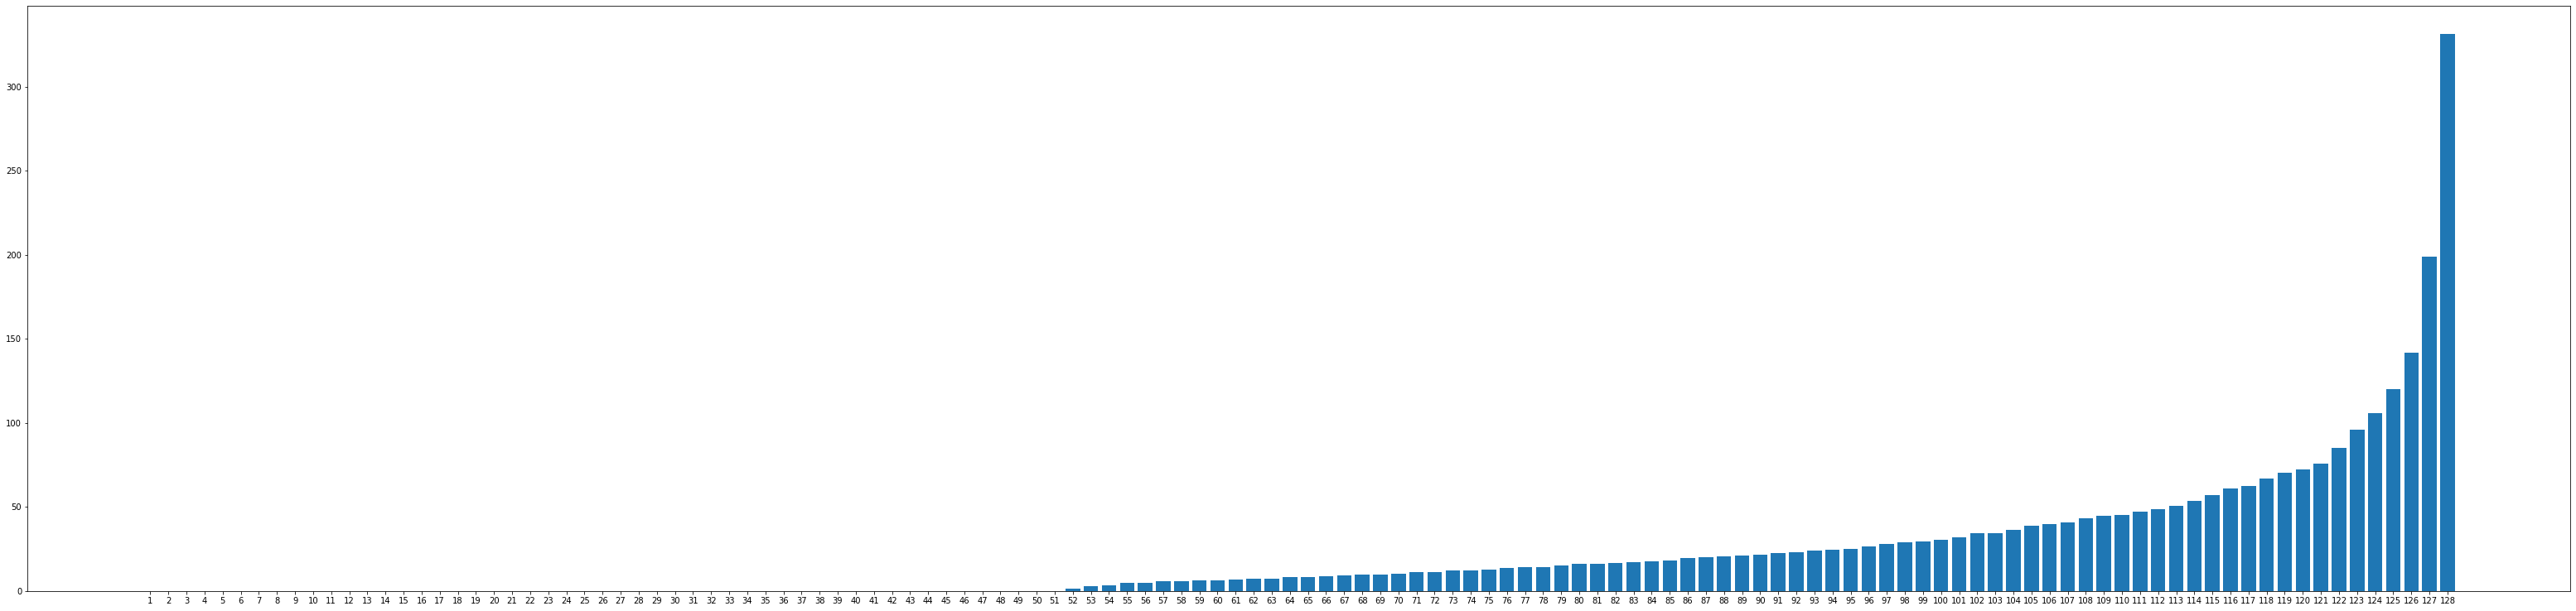

(800, 57)


In [5]:
PC_X = PCA(X)
print(PC_X.shape)

In [6]:
class1 = PC_X[:len(df.loc[df['Unnamed: 1'] == 'male'])]
class2 = PC_X[len(df.loc[df['Unnamed: 1'] == 'male']):]

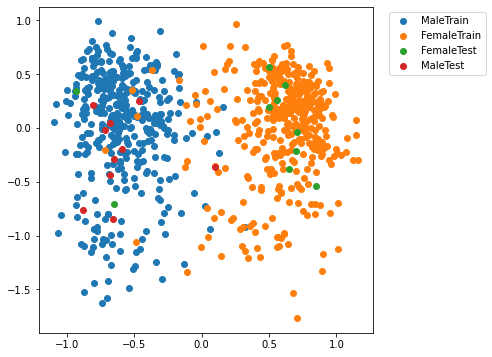

In [7]:
train1 = class1[10:]
test1 = class1[:10]

train2 = class2[10:]
test2 = class2[:10]

plt.figure(figsize= (6, 6))

plt.scatter(train1[:,0], train1[:,1])
plt.scatter(train2[:,0], train2[:,1])

plt.scatter(test2[:,0], test2[:,1])
plt.scatter(test1[:,0], test1[:,1])

plt.legend(['MaleTrain', 'FemaleTrain', 'FemaleTest', 'MaleTest'],loc='upper right',bbox_to_anchor=(1.35, 1))
plt.show()

In [8]:
# square root of sum of square of distances

print('Predictions for the male test points:\n')

pred_test1 = []

for samp in test1:

    pred_test1.append(np.sqrt(np.sum(np.square(train1 - samp))) < np.sqrt(np.sum(np.square(train2 - samp))))
    print('The predition is', np.sqrt(np.sum(np.square(train1 - samp))) < np.sqrt(np.sum(np.square(train2 - samp))))

pred_test1 = np.stack(pred_test1) * 1

print('\n-------------------')
print('\nPredictions for the female test points:\n')

pred_test2 = []

for samp in test2:
    
    pred_test2.append(np.sqrt(np.sum(np.square(train1 - samp))) > np.sqrt(np.sum(np.square(train2 - samp))))
    print('The predition is', np.sqrt(np.sum(np.square(train1 - samp))) > np.sqrt(np.sum(np.square(train2 - samp))))

pred_test2 = np.stack(pred_test2) * 1

Results = pred_test1+pred_test2


Predictions for the male test points:

The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is False
The predition is True
The predition is True

-------------------

Predictions for the female test points:

The predition is False
The predition is False
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True


Accuracy is: 85.0 %


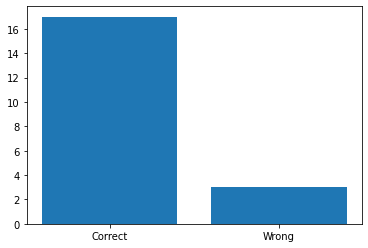

In [9]:
Results = list(pred_test1)+list(pred_test2)
plt.bar(["Correct","Wrong"],[Results.count(1),Results.count(0)])

accuracy = Results.count(1)/len(Results)
print("Accuracy is:",accuracy*100,"%")

## Question 2

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv ("gender_feature_vectors.csv")
df.head(3)

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,1,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,2,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,3,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116


In [12]:
maleTrain = df[df['Unnamed: 1']=='male'].iloc[10:,2:]
femaleTrain = df[df['Unnamed: 1']=='female'].iloc[10:,2:]

maleTest = df[df['Unnamed: 1']=='male'].iloc[:10,2:]
femaleTest = df[df['Unnamed: 1']=='female'].iloc[:10,2:]

meanMale = np.array([np.mean(maleTrain[str(i)]) for i in range(128)])
meanFemale = np.array([np.mean(femaleTrain[str(i)]) for i in range(128)])
mean = [np.mean(df[str(i)]) for i in range(128)]



In [13]:
#Within Class Scatter
def ScatterClass(mat,mean):
    S = np.matrix(np.zeros((len(mat.columns),len(mat.columns))))
    for i in range(len(mat)):
        z = np.matrix(np.array(mat.iloc[i,:])-mean)
        S = S + np.matmul(z.T,z)
    return S

In [14]:
S1 = ScatterClass(maleTrain,meanMale)
S2 = ScatterClass(femaleTrain,meanFemale)

In [15]:
Sw = S1+S2
Swinv = np.linalg.inv(Sw)
meandiff = np.matrix(meanMale - meanFemale).T
W = Swinv*meandiff

In [16]:
points = [float(np.dot(df.iloc[i,2:],W)) for i in range(len(df))]
colours = [len(df.iloc[i,1]) for i in range(len(df))]

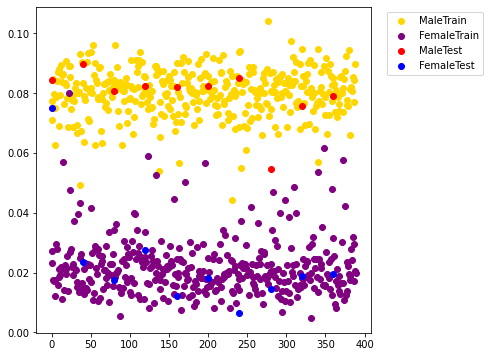

In [17]:
plt.figure(figsize= (6, 6))
plt.scatter(range(389),points[10:399],c='gold')
plt.scatter(range(390),points[410:],c='purple')

plt.scatter(range(0,400,40),points[:10],c='red')
plt.scatter(range(0,400,40),points[400:410],c='blue')
plt.legend(['MaleTrain', 'FemaleTrain', 'MaleTest', 'FemaleTest'],loc='upper right',bbox_to_anchor=(1.35, 1))
plt.show()

In [18]:
MaleMean = np.mean(points[10:399])
FemaleMean = np.mean(points[410:])

pred_male = [abs(i-MaleMean)<abs(i-FemaleMean) for i in points[:10]]
pred_female = [abs(i-MaleMean)>abs(i-FemaleMean) for i in points[400:410]]

print("Predictions for the male test points:\n")
[print("The predition is",i) for i in pred_male]
print ("-"*80,"\n")
print("Predictions for the female test points:\n")
[print("The predition is",i) for i in pred_female]
print()

Predictions for the male test points:

The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
-------------------------------------------------------------------------------- 

Predictions for the female test points:

The predition is False
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True



Accuracy is: 95.0 %


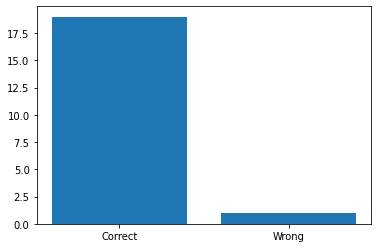

In [19]:
Results = list(pred_male)+list(pred_female)
plt.bar(["Correct","Wrong"],[Results.count(1),Results.count(0)])

accuracy = Results.count(1)/len(Results)
print("Accuracy is:",accuracy*100,"%")

## Question 3

In [20]:
#Importes sklearn for the confusion matix (this code depends on vars pred_test1,pred_test2,pred_male,pred_female of Q1,2)
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [21]:
TruePred = ['Male']*10 + ['Female']*10
PCApred = ['Male' if i else 'Female' for i in pred_test1]+['Female' if i else 'Male' for i in pred_test2]
LDApred = ['Male' if i else 'Female' for i in pred_male]+['Female' if i else 'Male' for i in pred_female]

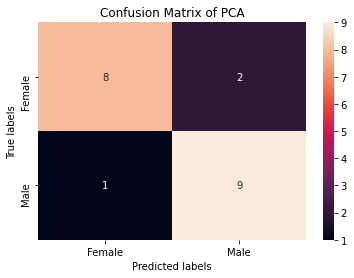

In [22]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(TruePred,PCApred), annot=True, ax=ax) # annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of PCA')
ax.xaxis.set_ticklabels(["Female","Male"])
ax.yaxis.set_ticklabels(["Female","Male"])
plt.show()

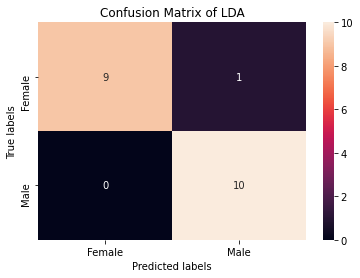

In [23]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(TruePred,LDApred), annot=True, ax=ax) # annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of LDA')
ax.xaxis.set_ticklabels(["Female","Male"])
ax.yaxis.set_ticklabels(["Female","Male"])
plt.show()

1. LDA has lesser Features than PCA, however it gives higher accuracy than PCA
2. PCA misclassifies 2 females as male and 1 male as female (3 misclassifications) and has an accuracy of 85%
3. LDA misclassifies 1 female as male (1 misclassification) and has an accuracy of 95%
4. Despite PCA using more features, LDA works better
5. Hence in this case we can say that LDA is better than PCA

## Question 4

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
df = pd.read_csv('face.csv')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0


In [26]:
Classes = df['target']
df.drop(columns = ['target'],inplace=True)

In [27]:
def PCA(X):

    mean = np.average(X, axis = 0)

    Z = (X - mean) /  (np.max(X, axis = 0) - np.min(X, axis = 0))
    cov_mat = np.dot(Z.T, Z)

    e_val, e_vec = np.linalg.eigh(cov_mat)
    print('Eigen value shape :', e_val.shape,'Eigen vector shape :', e_vec.shape)

    sorted_e_val = np.flip(np.sort(e_val))
    sorted_e_vec = e_vec.copy()
    dummy = 0

    for val in sorted_e_val:
        ind = np.argmax(e_val == val * 1)
        sorted_e_vec[:,dummy] = e_vec[:,ind]
        dummy +=1

    variances = []
    for i in sorted_e_val:
        variances.append(i/np.sum(sorted_e_val))
        
    variances.sort()
    d_dash = 0
    var = 0
    
    for i in variances[::-1]:
        if(var<0.95):
            var = var + i
            d_dash = d_dash + 1
        else:
            break
        
    plt.figure(figsize= (55, 13))
    plt.bar([str(i + 1) for i in range(len(e_val))], np.sort(e_val))
    plt.show()

    Z_star = np.dot(Z, sorted_e_vec)

    return Z_star[:,:d_dash]

Eigen value shape : (4096,) Eigen vector shape : (4096, 4096)


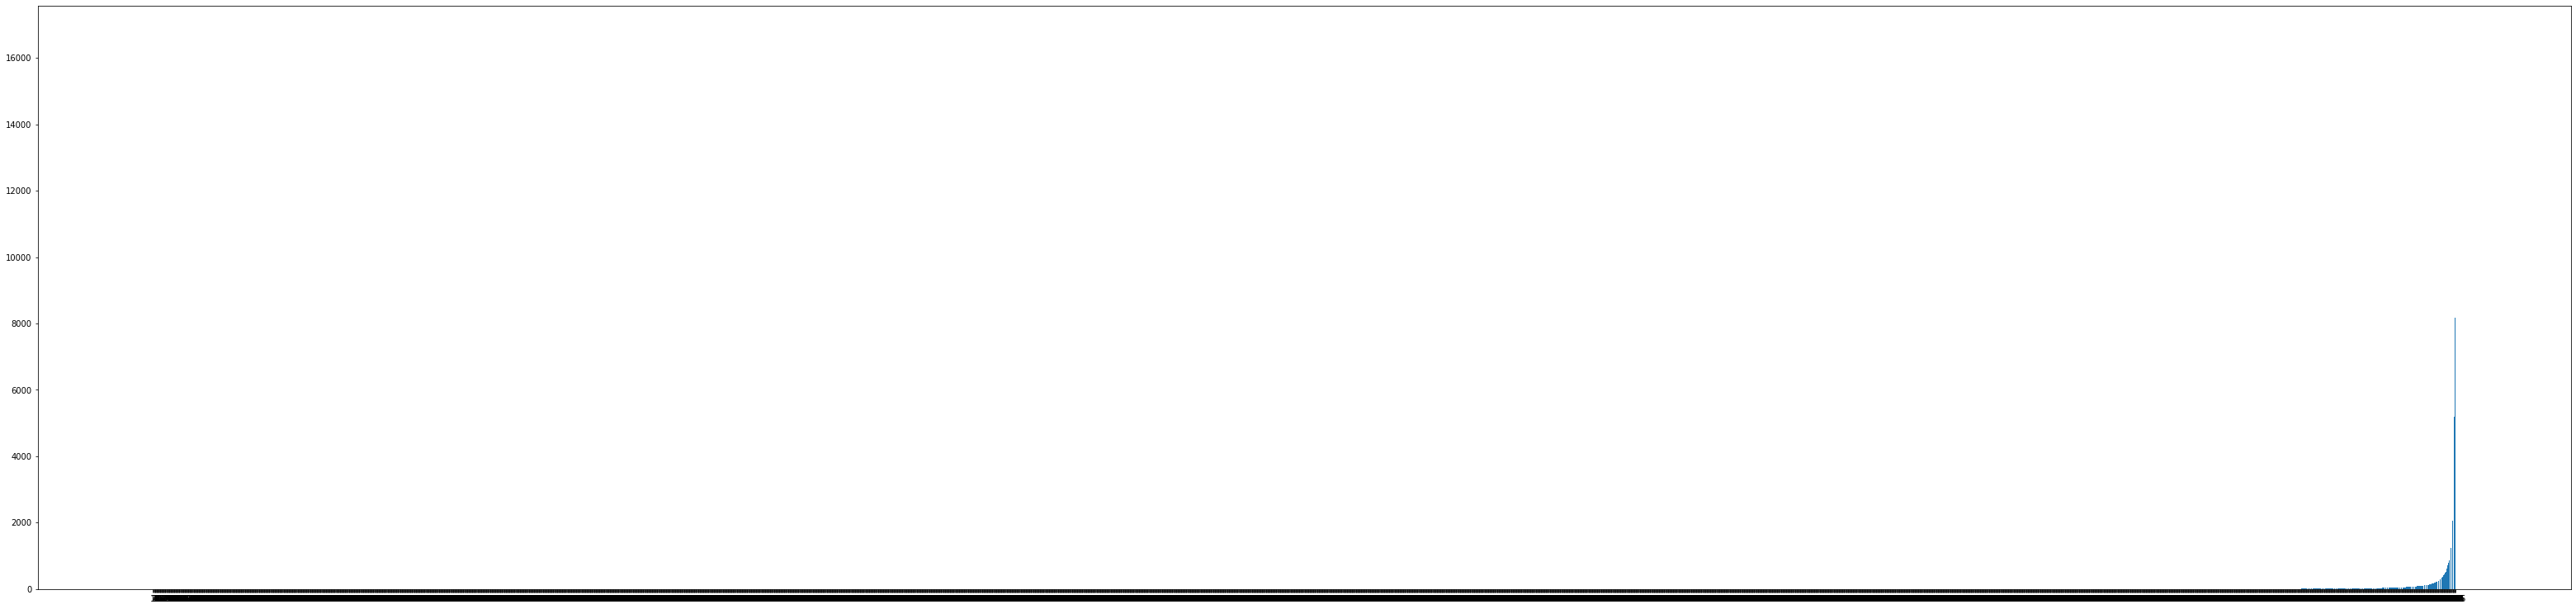

(400, 121)


In [28]:
PC_X = PCA(df)
print(PC_X.shape)

In [29]:
#Import test train split to help in randomly splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(PC_X,Classes,test_size=0.2,stratify=Classes,random_state=39)

In [30]:
#Using Naive bayes classifier to test the accuracy of the model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
y_test = list(y_test)
accurate = list(y_test==predictions)
print("Accuracy =",(accurate.count(True)/len(accurate))*100,"%")

Accuracy = 93.75 %


## Question 5

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [32]:
faceData = pd.read_csv('face.csv')
faceData.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [33]:
faceData['target'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [34]:
test_data = faceData.groupby('target').apply(lambda x: x.head(2)).reset_index(drop=True)
train_data = faceData.groupby('target').apply(lambda x: x.tail(8)).reset_index(drop=True)

X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

In [35]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        # Subtract the mean of each variable
        self.mean = np.mean(X, axis=0)

        # Initialize matrices
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))

        # Iterate for each class
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - self.mean).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)

        # Compute eigenvalues and eigenvectors of SW^-1 * SB
        self.eigenvalues, self.eigenvectors = np.linalg.eigh(A)

        # Sort Eigenvalues in descending order
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        self.eigenvectors = self.eigenvectors.T
        idxs = np.argsort(abs(self.eigenvalues))[::-1]
        self.eigenvalues = self.eigenvalues[idxs]
        self.eigenvectors = self.eigenvectors[idxs]

        # Get required eigen vectors
        if self.n_components > 0:
            # Select a subset from the rearranged Eigenvalue matrix
            self.components = self.eigenvectors[:self.n_components]
        else:
            raise Exception("Minimum dimension should be more than 0")

    def transform(self, X):
        # Project data
        return np.dot(X, self.components.T)

    def plot(self):
        # Plot data
        plt.figure(figsize=(32, 18))
        plt.xlabel('Dimensions')
        plt.ylabel('Eigen Values')
        sns.barplot(x=[i for i in range(len(self.eigenvalues))], y=self.eigenvalues)

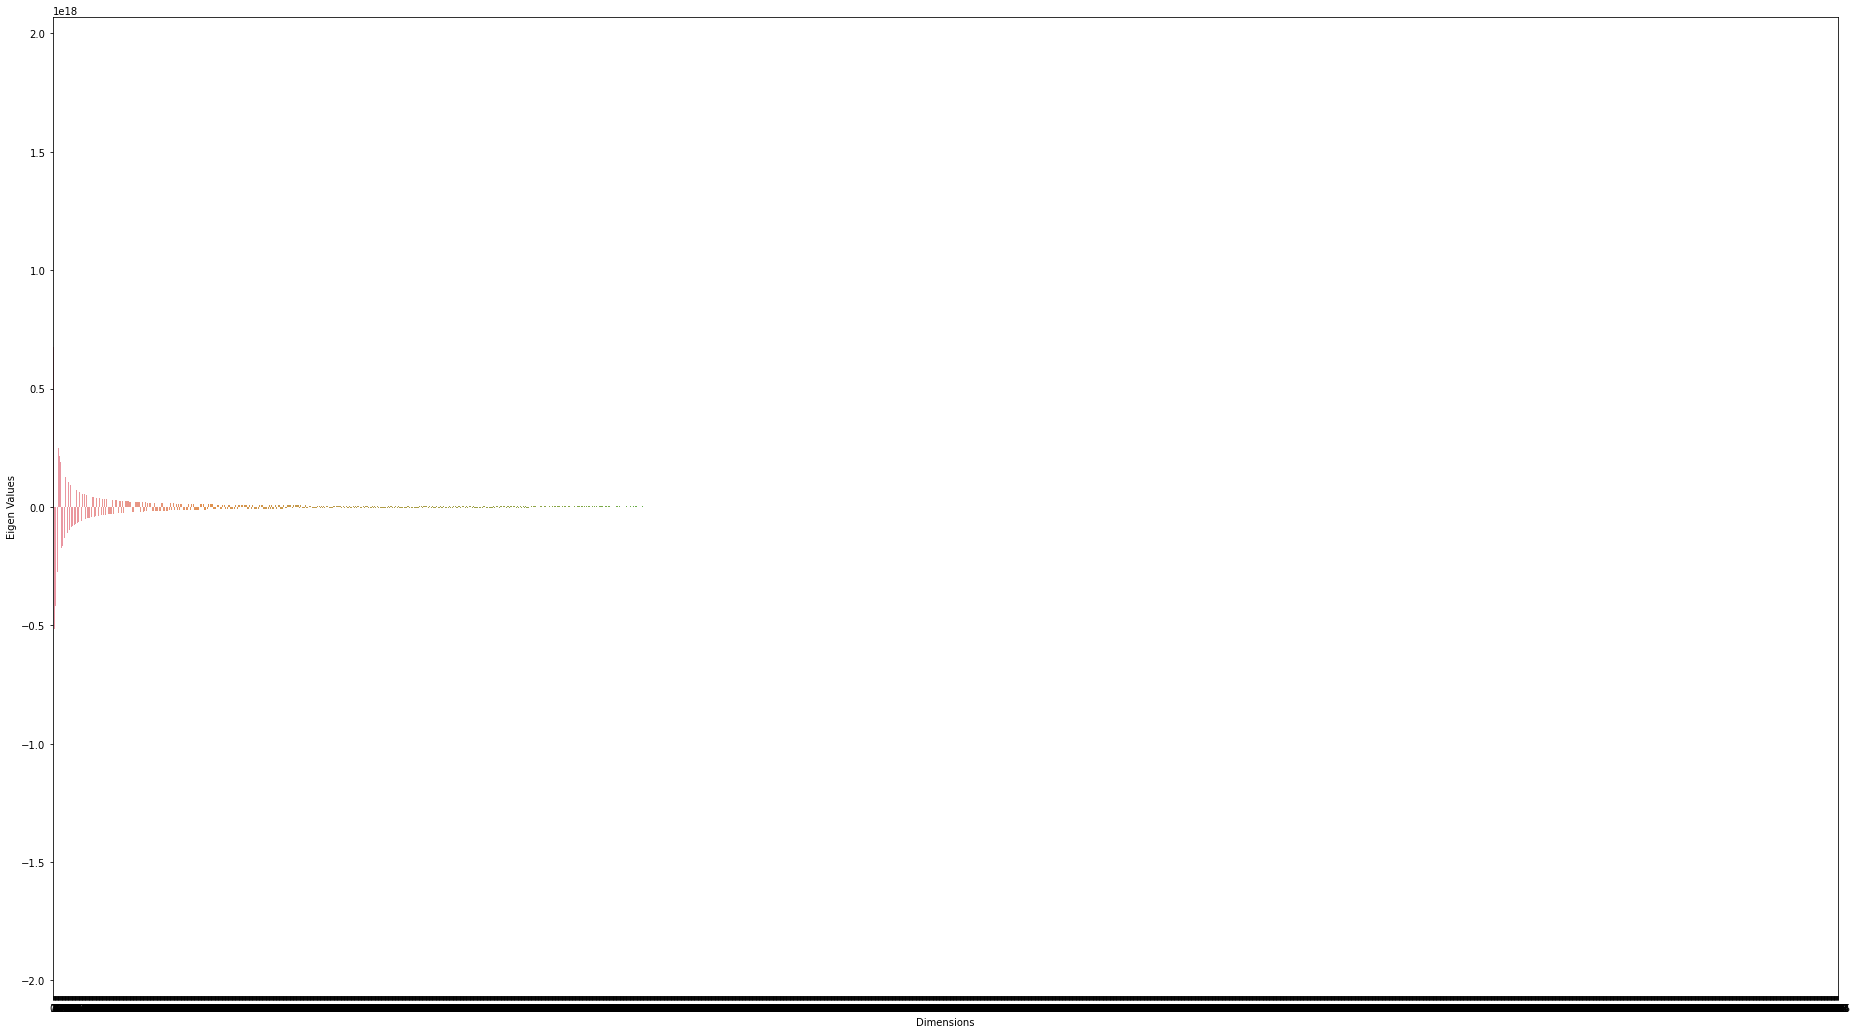

In [36]:
lda = LDA(39)
lda.fit(X_train.to_numpy(), y_train.to_numpy())
lda.plot()

In [37]:
X_test_transformed = lda.transform(X_test)
X_train_transformed = lda.transform(X_train)

In [38]:
print("d' =", X_train_transformed.shape[1])

d' = 39


<AxesSubplot:xlabel='PC0', ylabel='PC1'>

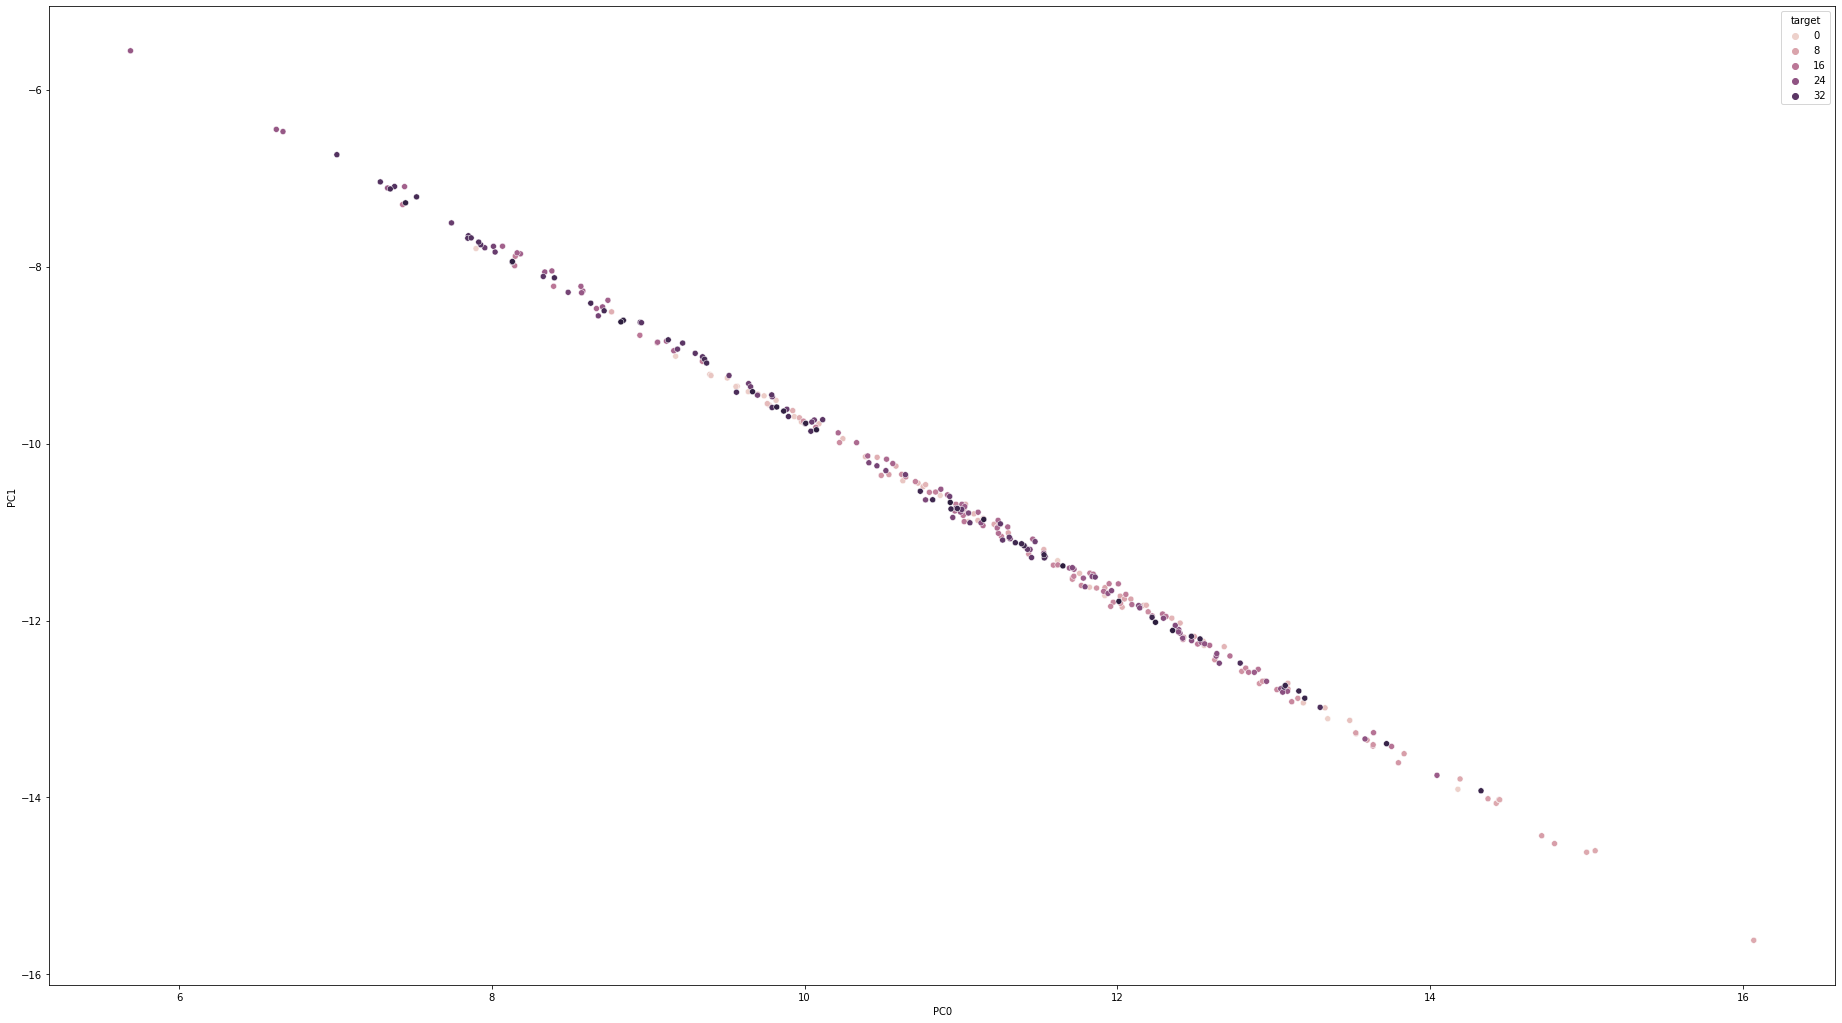

In [39]:
X_train_graph = pd.DataFrame(X_train_transformed, columns=[f'PC{i}' for i in range(X_train_transformed.shape[1])])

# Concat it with target variable to create a complete Dataset
X_train_graph = pd.concat([X_train_graph, pd.DataFrame(y_train, columns=['target'])], axis=1)

plt.figure(figsize=(32, 18))
sns.scatterplot(data=X_train_graph, x='PC0', y='PC1', hue='target')

In [40]:
# Fitting and predicting
model = GaussianNB()
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)

# Finding accuracy
print("Accuracy =", accuracy_score(y_pred, y_test))

Accuracy = 0.85
